# Demo Notebook for Using the SPIN API

## Initialize the SPIN class


In [6]:
# Define paths for annotations and images
from spin import SPIN, InitialRequestError
import matplotlib.pyplot as plt

annotation_dir = "PartImageNet/jsons"
image_dir = "PartImageNet/images"
split = "train"
spin_api = SPIN(
    annotation_dir=annotation_dir, image_dir=image_dir, split=split, download=True
)

File downloaded	successfully and saved to PartImageNet/jsons/spin.zip
File unzipped successfully to PartImageNet/jsons
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!


## Download the dataset (if not already downloaded)

In [7]:
# This will download the dataset and save it in the annotation directory
try:
    spin_api.download_spin(save_directory=annotation_dir)
except InitialRequestError as e:
    print(f"An error occurred: {e}")

File downloaded	successfully and saved to PartImageNet/jsons/spin.zip
File unzipped successfully to PartImageNet/jsons


## Play around with all the functions we have to offer!

Total number of images in split train: 8828


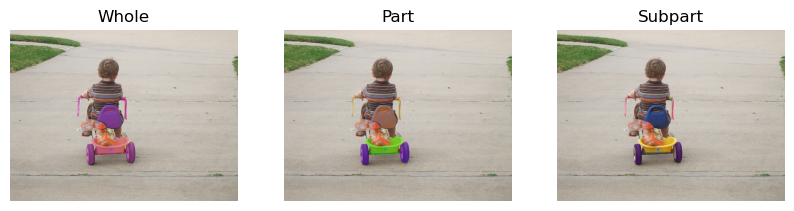

Object name for image ID 0: Bicycle
Subpart categories: {1: {'id': 1, 'name': 'Quadruped-Head-Eyes'}, 2: {'id': 2, 'name': 'Quadruped-Head-Ears'}, 3: {'id': 3, 'name': 'Quadruped-Head-Nose'}, 4: {'id': 4, 'name': 'Quadruped-Head-Mouth'}, 5: {'id': 5, 'name': 'Quadruped-Head-Horns'}, 6: {'id': 6, 'name': 'Quadruped-Head-Tusk'}, 7: {'id': 7, 'name': 'Quadruped-Head-Forehead'}, 8: {'id': 8, 'name': 'Quadruped-Head-Cheek'}, 9: {'id': 9, 'name': 'Quadruped-Head-Neck'}, 10: {'id': 10, 'name': 'Quadruped-Head-Snout'}, 11: {'id': 11, 'name': 'Quadruped-Torso-Back'}, 12: {'id': 12, 'name': 'Quadruped-Torso-Chest'}, 13: {'id': 13, 'name': 'Quadruped-Torso-Belly'}, 14: {'id': 14, 'name': 'Quadruped-Torso-Side'}, 15: {'id': 15, 'name': 'Quadruped-Torso-Shoulders'}, 16: {'id': 16, 'name': 'Quadruped-Torso-Neck'}, 17: {'id': 17, 'name': 'Quadruped-Legs-Toes/hoof'}, 18: {'id': 18, 'name': 'Quadruped-Legs-Claws'}, 19: {'id': 19, 'name': 'Quadruped-Legs-Pads'}, 20: {'id': 20, 'name': 'Quadruped-Legs-Do

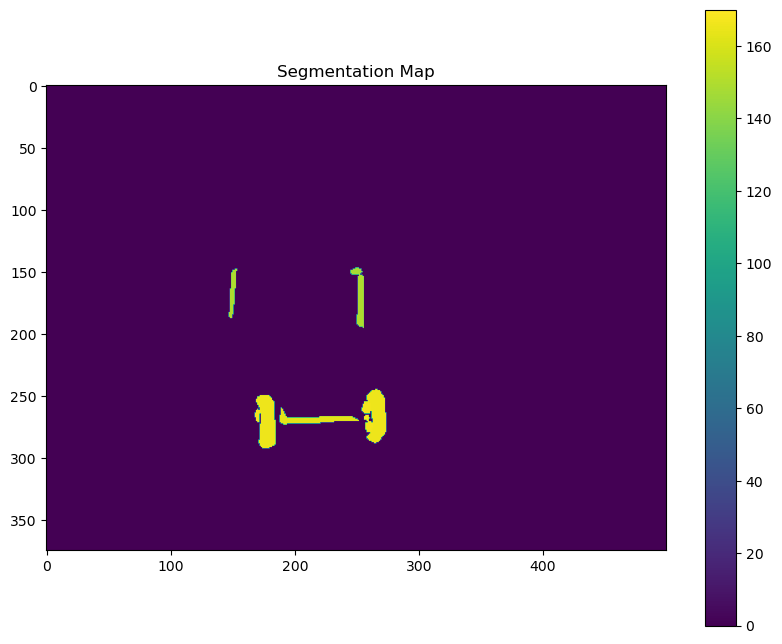

In [8]:
## Get image IDs
# Get all image IDs in the dataset
image_ids = spin_api.getImgIds()
print(f"Total number of images in split {spin_api.split}: {len(image_ids)}")

## Display an image and its annotations
# Select an image ID
image_id = image_ids[0]

# Display the image and its annotations
spin_api.display_annotations(image_id, fig_size=[10, 8], draw_bbox=False)

## Get the object name for a file
# Get the object name for the selected image ID
object_name = spin_api.get_object_name_for_file(image_id)
print(f"Object name for image ID {image_id}: {object_name}")

## Get categories for different granularities
# Get subpart categories
subpart_categories = spin_api.get_categories(granularity="subpart")
print(f"Subpart categories: {subpart_categories}")

# Get part categories
part_categories = spin_api.get_categories(granularity="part")
print(f"Part categories: {part_categories}")

# Get whole categories
whole_categories = spin_api.get_categories(granularity="whole")
print(f"Whole categories: {whole_categories}")

## Rasterize COCO segmentations
# Rasterize segmentations for the selected image ID
segmentation_map = spin_api.rasterize_coco_segmentations(
    spin_api.subparts, image_id, background_class=0
)

# Display the segmentation map
plt.imshow(segmentation_map)
plt.title("Segmentation Map")
plt.colorbar()
plt.show()

## Display a lot of annotations!

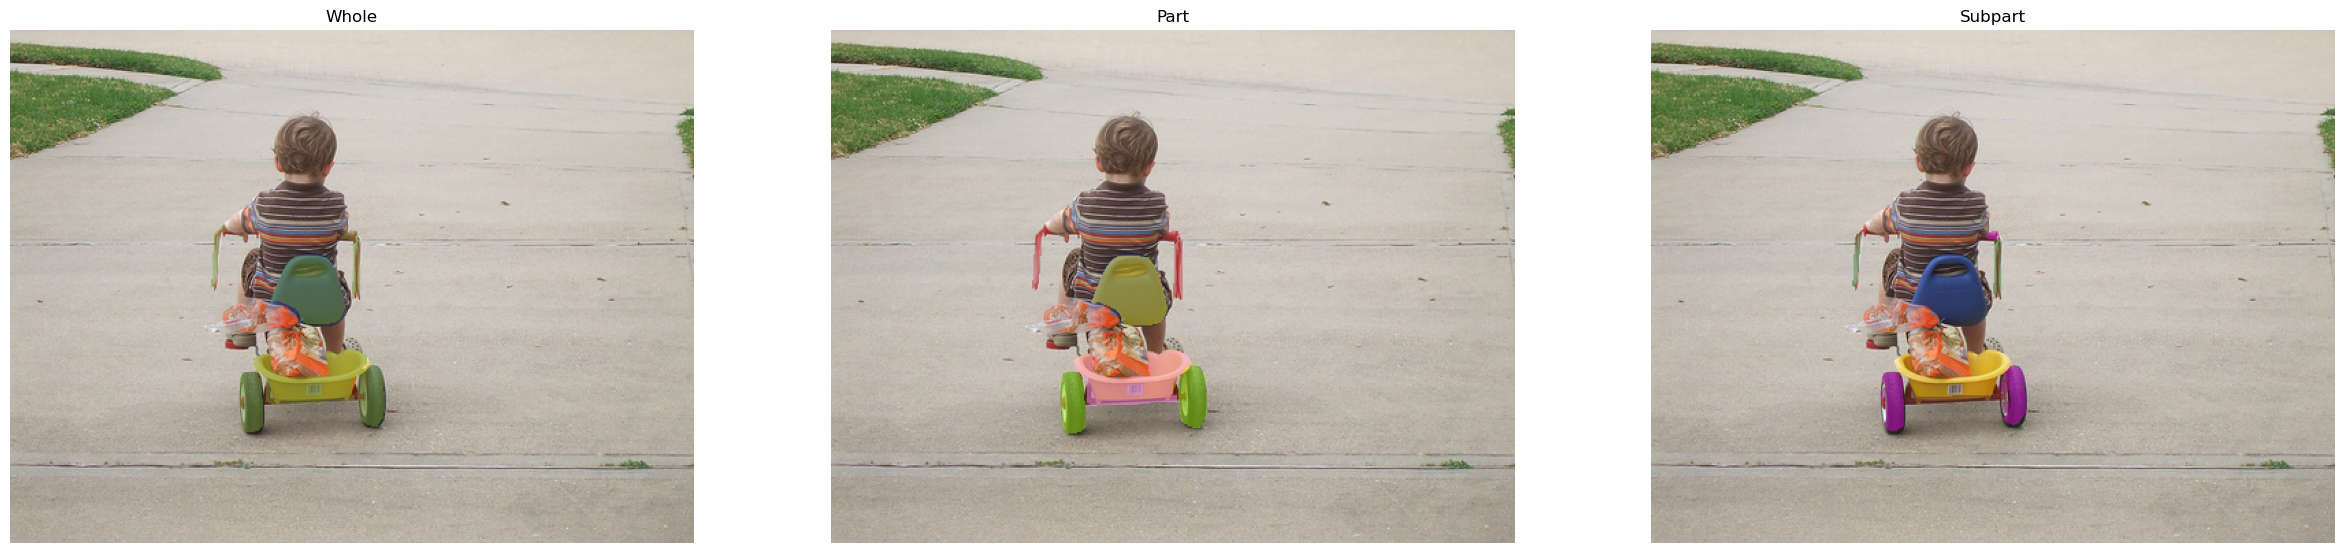

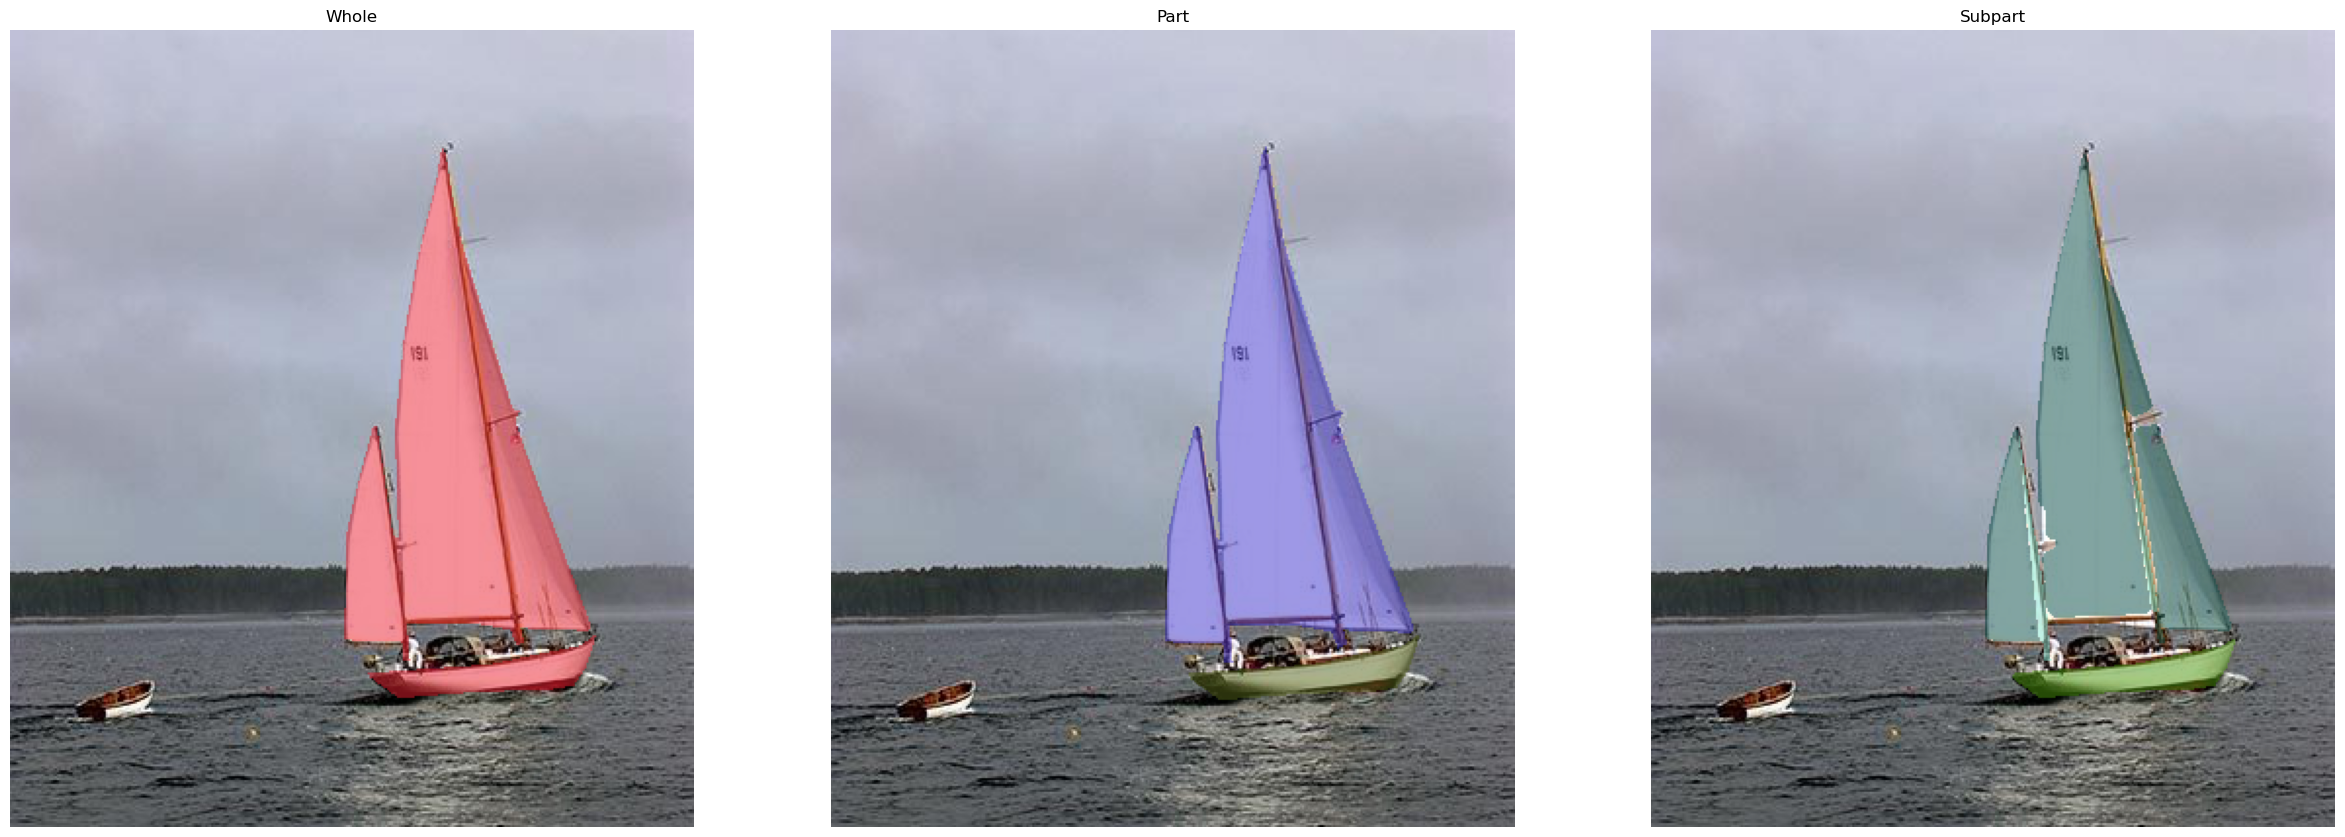

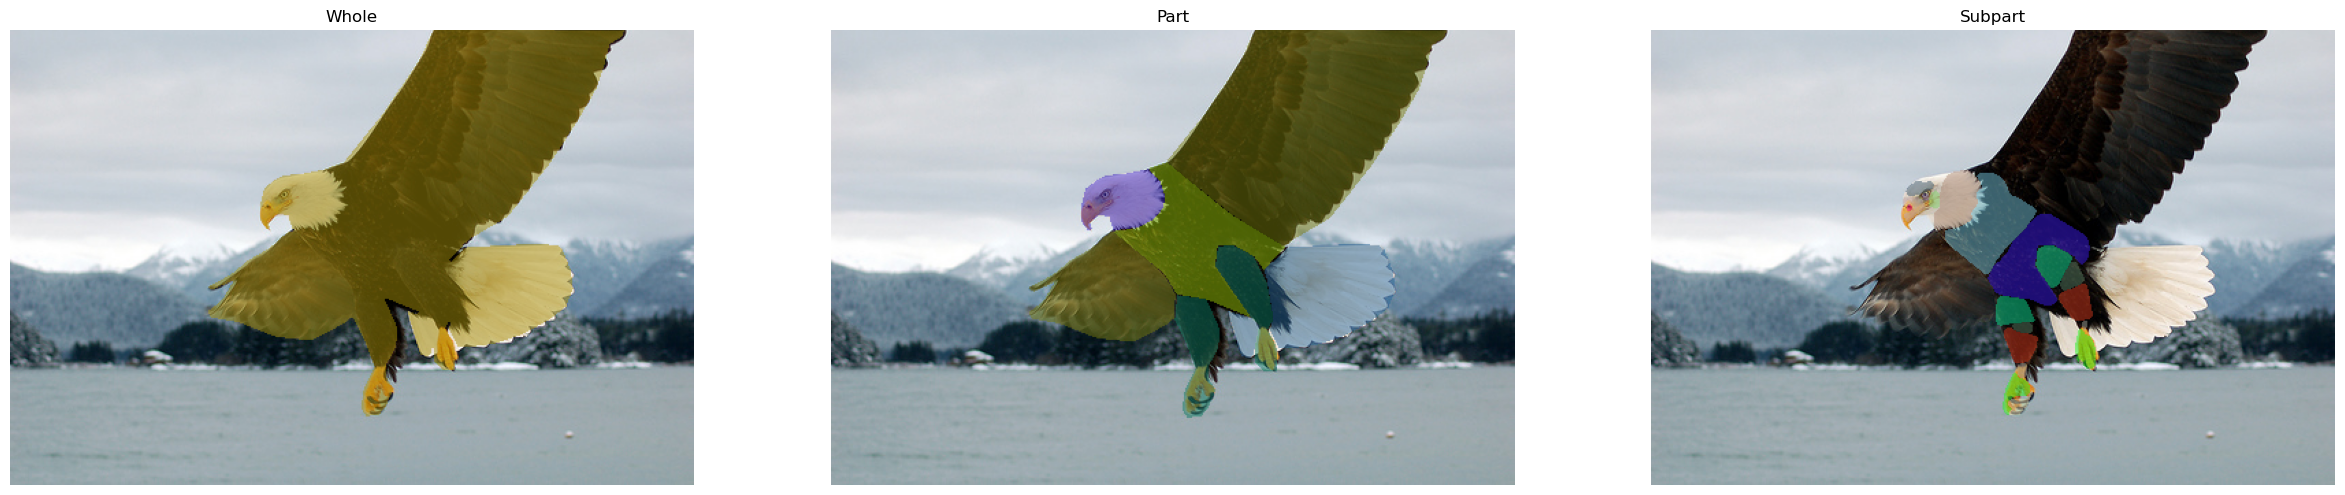

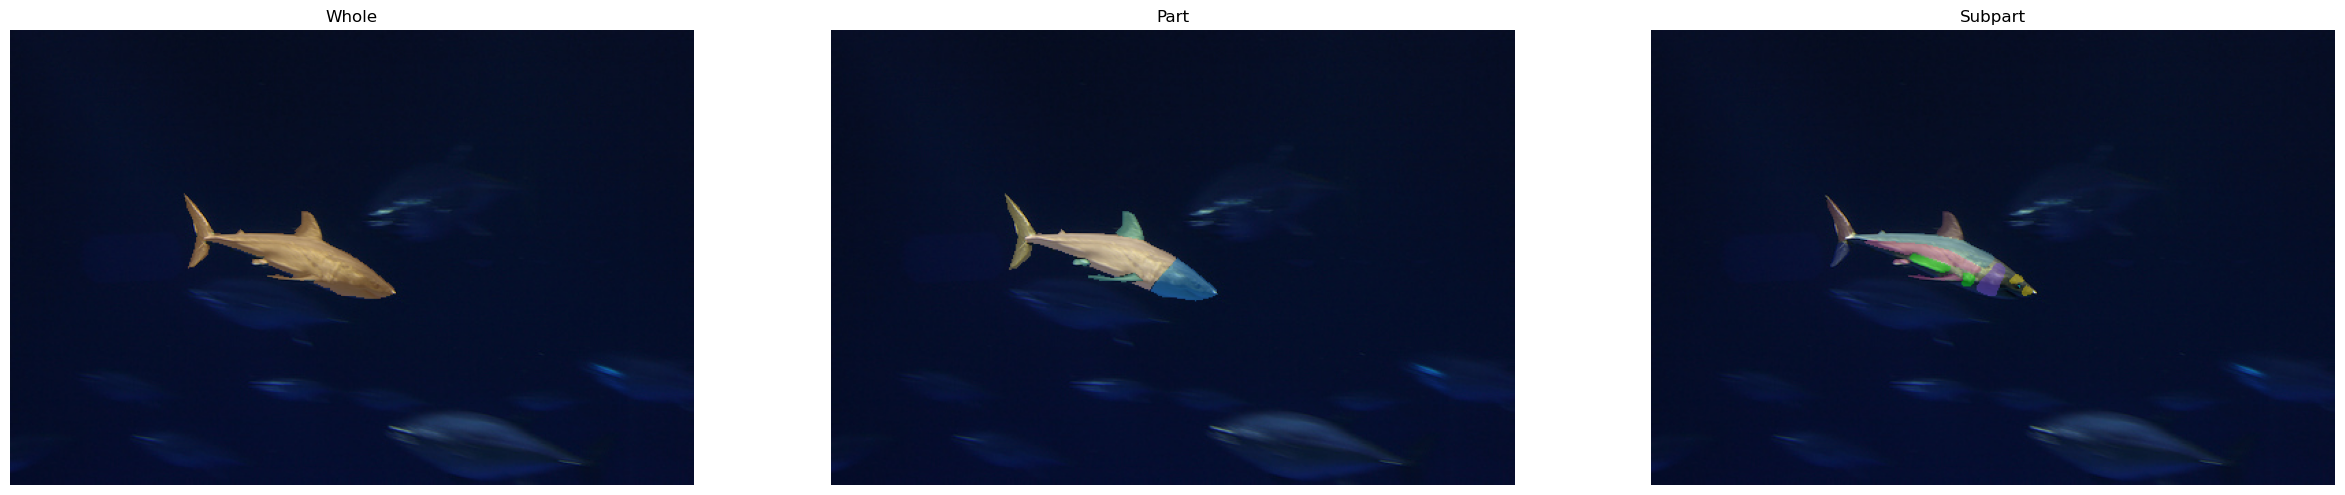

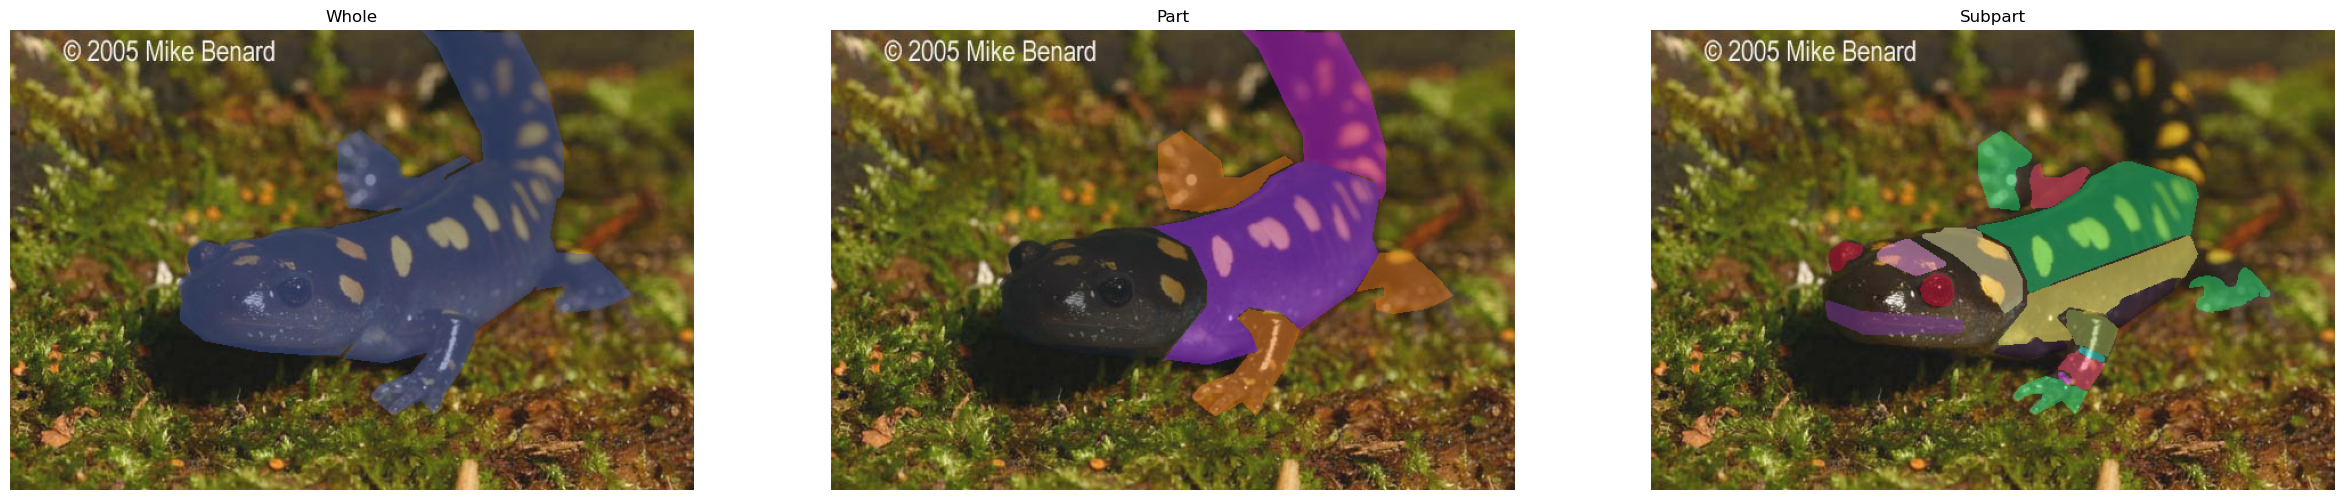

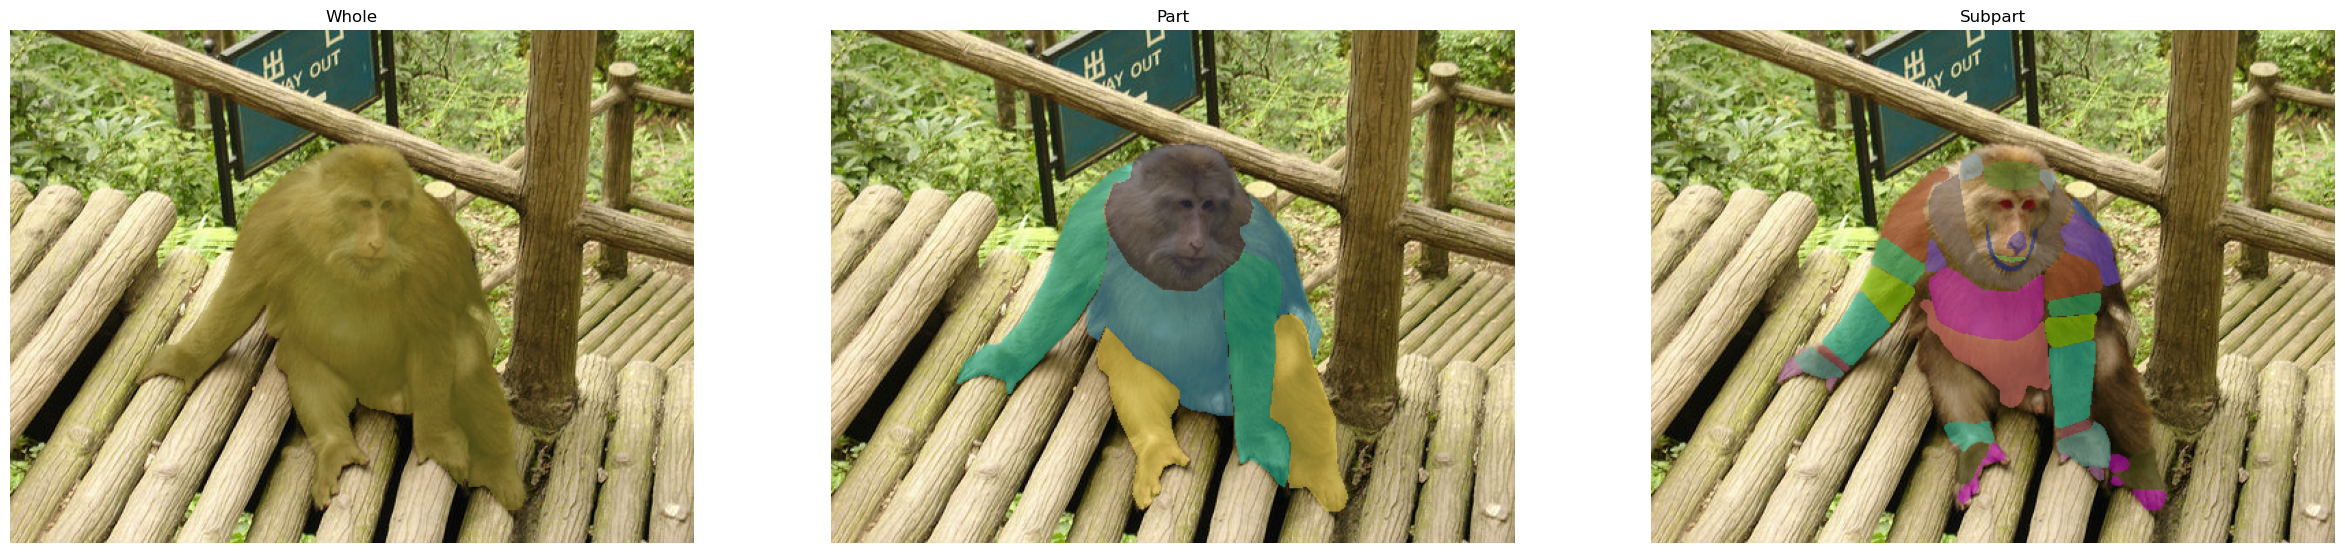

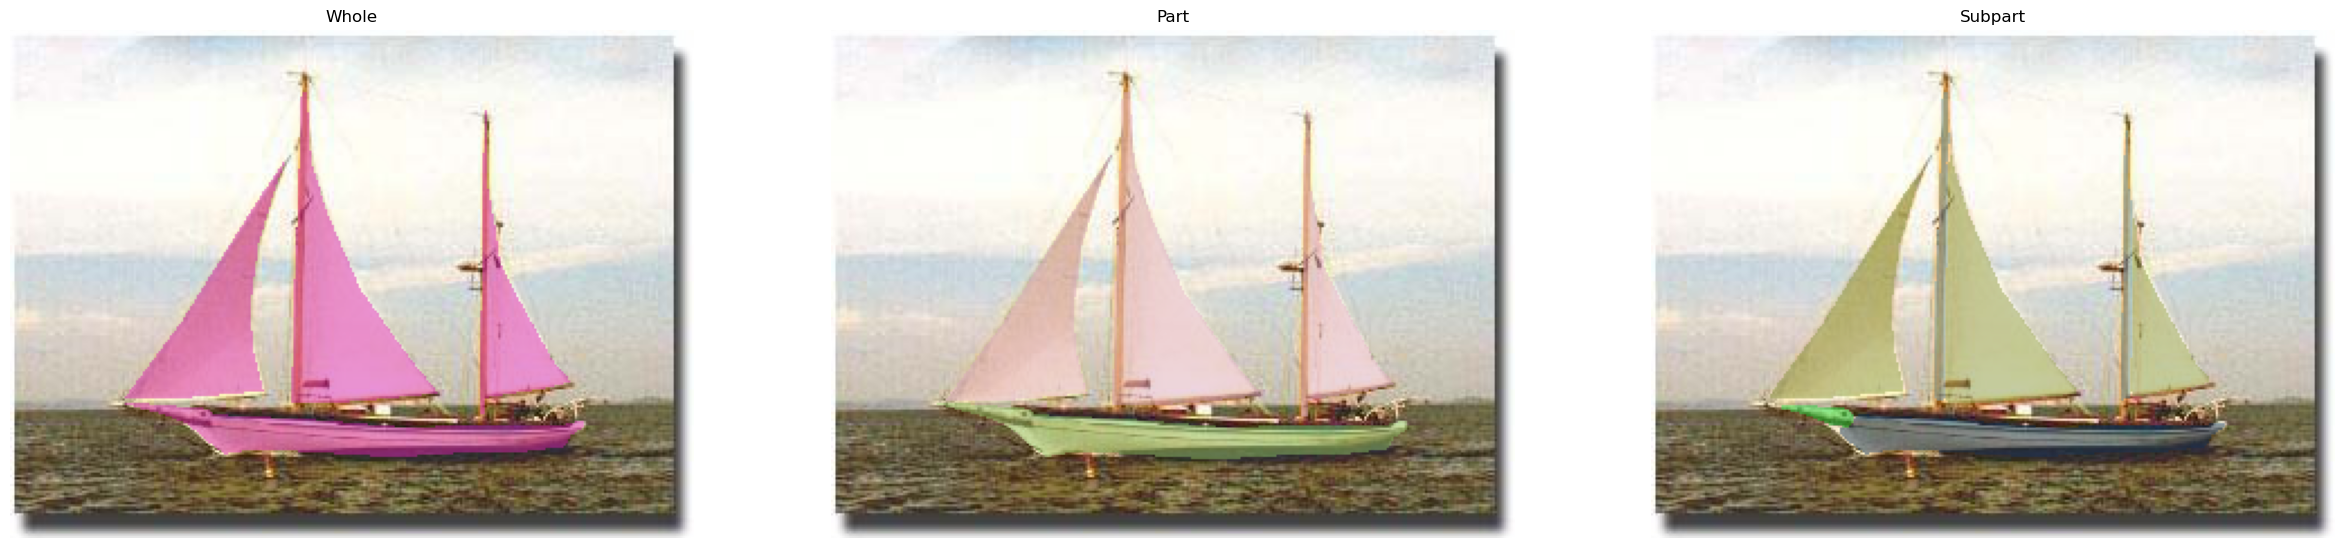

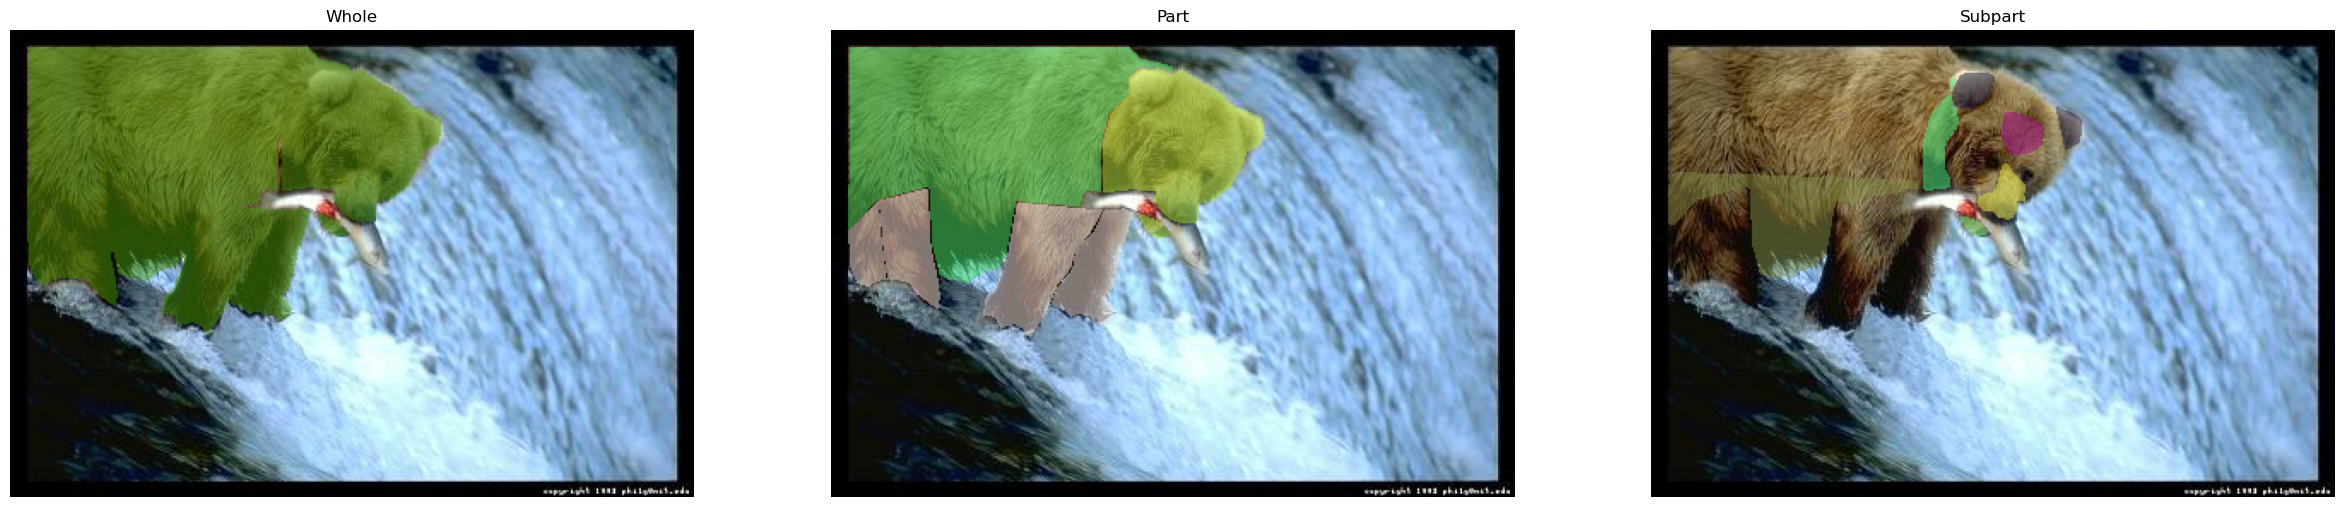

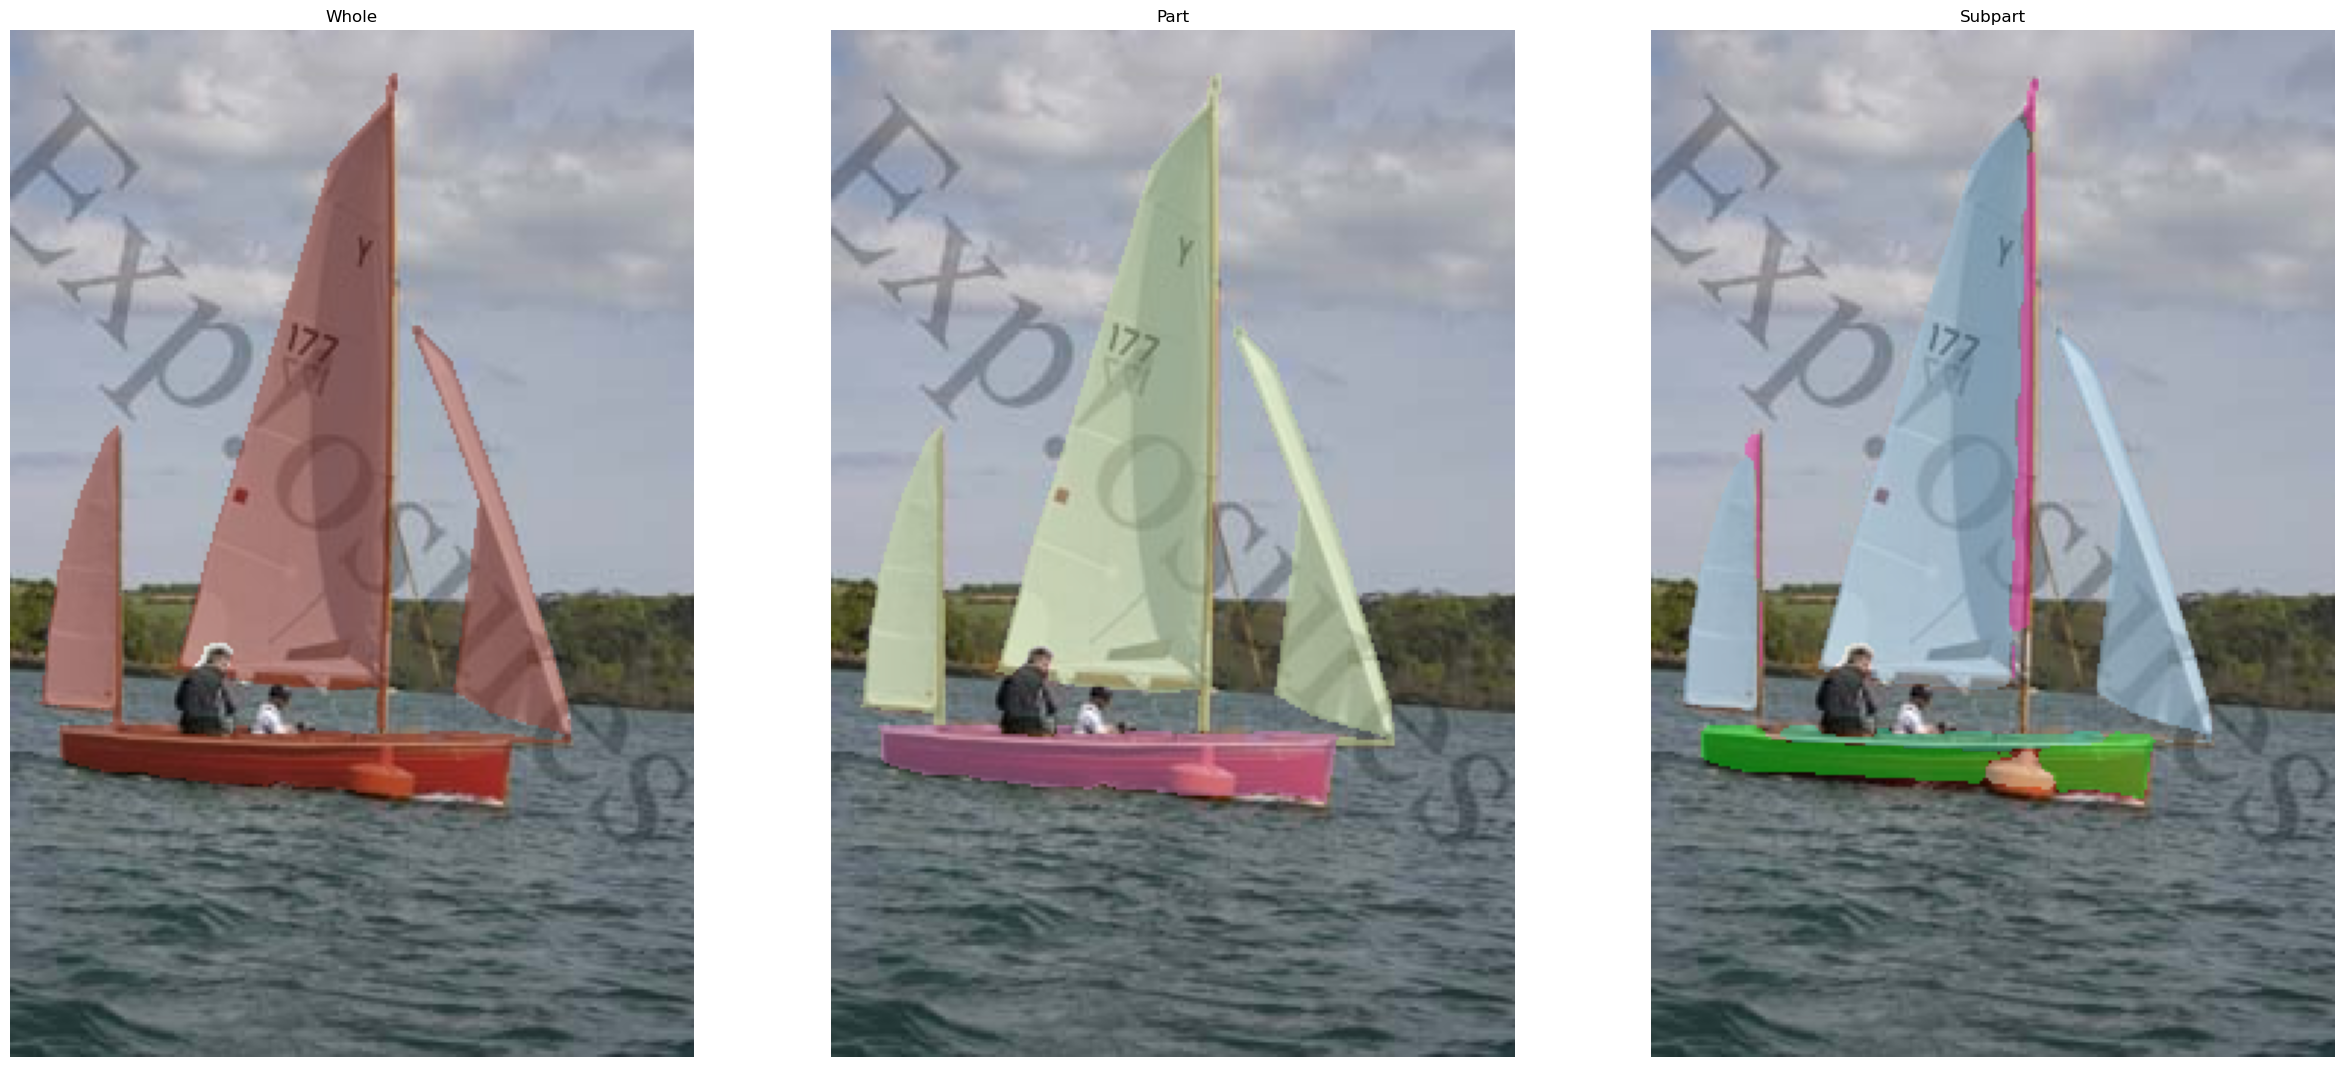

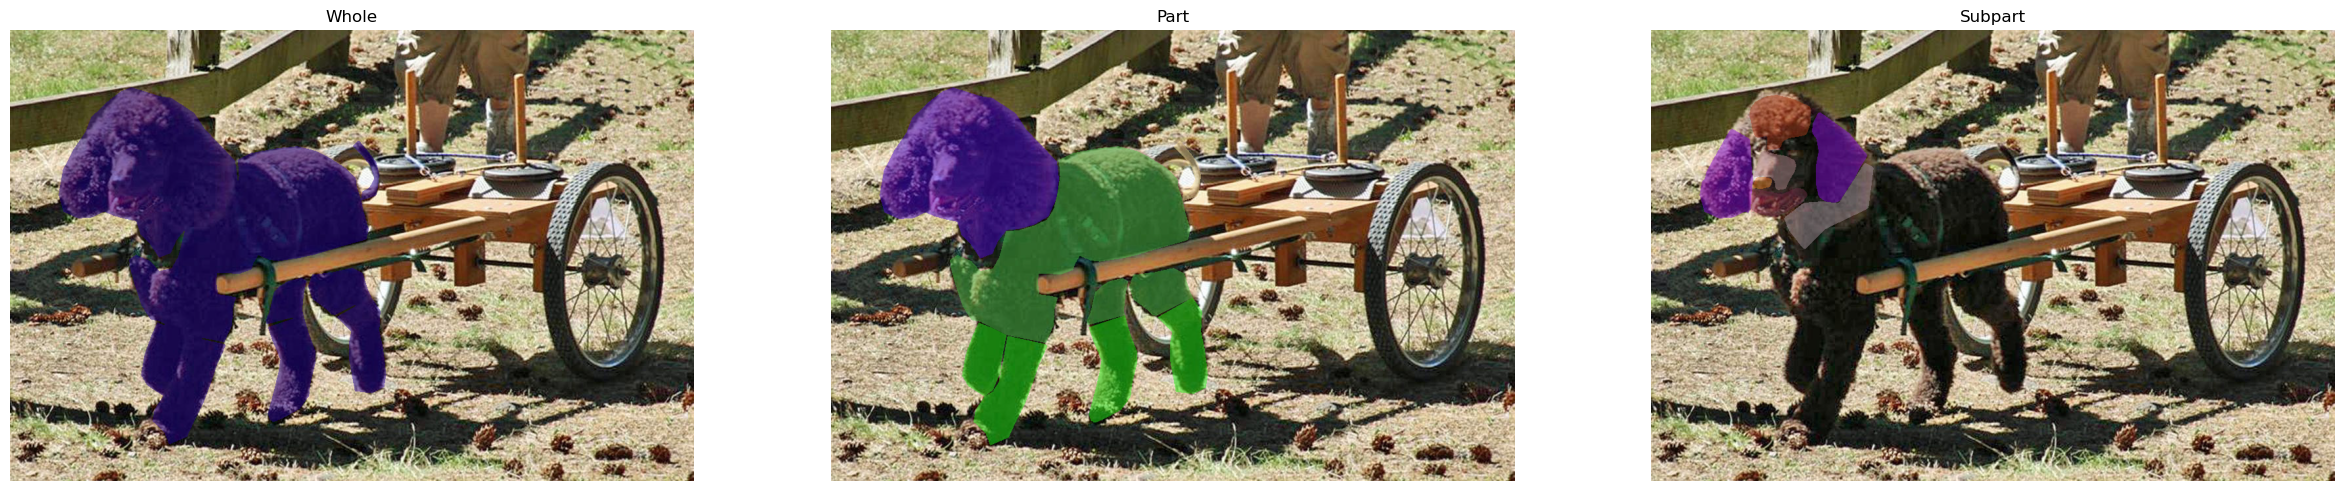

In [9]:
for im_id in spin_api.getImgIds()[:10]:
    spin_api.display_annotations(image_id=im_id)